<h1 style="font-weight: bold; color: #00DA81; background: #10000E; padding: 24px 12px; border-radius: 4px;"> Build your first Neural Network with Keras </h1>

Think of neurons as tiny brain cells that can receive, process, and transmit information. In a neural network, these neurons are arranged in layers, connected to each other like a web. Keras helps you define the structure of this neural network.

![neural net image](https://th.bing.com/th/id/OIP.DWqjoHtFyvC6eBV4ChNxzQAAAA?rs=1&pid=ImgDetMain)


<h1 style="font-weight: bold; color: #00DA81; background: #10000E; padding: 24px 12px; border-radius: 4px;">Step 0. Set it up</h1>
Import the libraries and loading the dataset.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


<div style="background: #e3eefc; padding: 24px 12px; margin: 4px 8px 4px 4px; border-radius: 4px;">
    <p style="font-weight: bold; color: #00373E;">Here, <code style="background:#00373E; border-radius: 4px;">x_train</code> and <code style="background:#00373E; border-radius: 4px;">x_test</code> represent the input images (handwritten digits), and <code style="background:#00373E; border-radius: 4px;">y_train</code> and <code style="background:#00373E; border-radius: 4px;">y_test</code> represent the corresponding labels (the actual digits).</div>

In [2]:
# print the shape of the datasets
print(f"Train data shape is {X_train.shape}\nwhile test data shape is {X_test.shape}")

Train data shape is (60000, 28, 28)
while test data shape is (10000, 28, 28)


<div style="background: #e3eefc; padding: 24px 12px; margin: 4px 8px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold; color: #00373E;">As you can see that I'm using <a style="color: #111AAF;" href="https://keras.io/api/datasets/mnist/">MNIST digits classification dataset</a> from Keras Datasets <span style="color: #00373E; font-weight: bold;">which is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.</span></p>
</div> 

<div><br></div>

#### Dataset License
Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset, which is a derivative work from original NIST datasets. MNIST dataset is made available under the terms of the [Creative Commons Attribution-Share Alike 3.0 license](https://creativecommons.org/licenses/by-sa/3.0/).

---

<h1 style="font-weight: bold; color: #00DA81; background: #10000E; padding: 24px 12px; border-radius: 4px;">Step 1. Data Exploration</h1>
For the sake of simplicity, I'll only view some values from the dataset without doing the full exploration process. 

<div><br></div>

---
##### *If you want to do more Data Exploration and EDA, check:*
- Mohamed Y. [Energy Data Analysis and Growth Speed](https://www.kaggle.com/code/mohamedyosef101/energy-data-analysis-and-growth-speed). Kaggle.
- Mohamed Y. [Marketing Promotions, Regression Analysis](https://www.kaggle.com/code/mohamedyosef101/marketing-promotions-analysis). Kaggle.
---

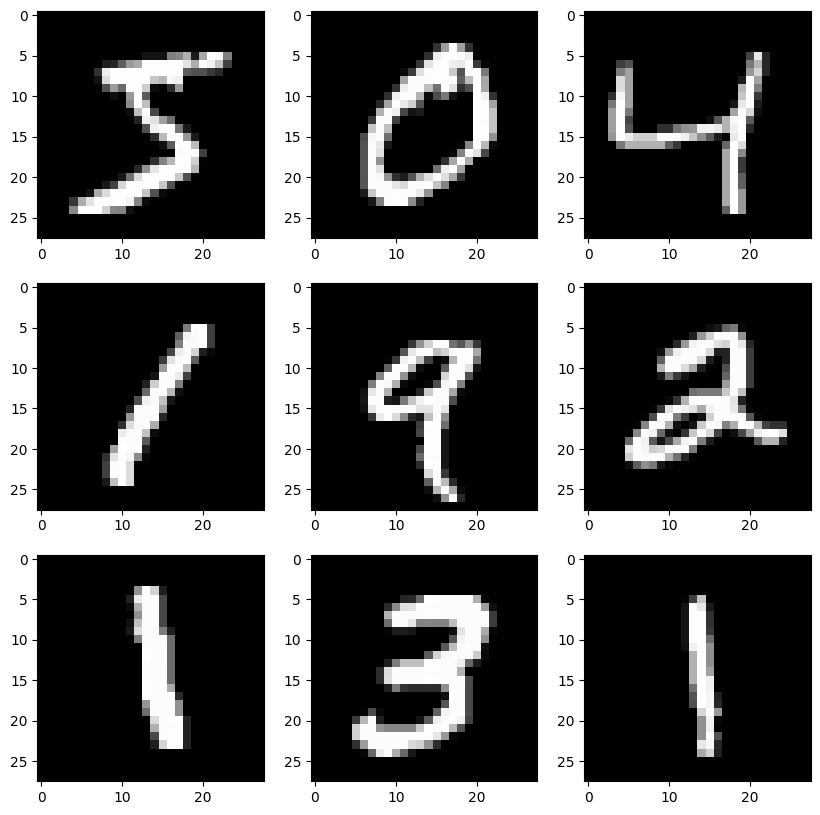

In [3]:
# viewing some values
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
a = 0

for i in range(3):
    for j in range(3):
        axes[i, j].imshow(X_train[a], cmap=plt.get_cmap('gray'))
        a = a + 1
        
plt.show()

<h1 style="font-weight: bold; color: #00DA81; background: #10000E; padding: 24px 12px; border-radius: 4px;">Step 2. Normalising the data</h1>

**Normalisation** is the process to adjusting data to a common scale, making data easier for neural networks to learn from it. It's like preparing the data for the network's "learning meal." **Just as a chef prepares ingredients before cooking, normalisation prepares data before feeding it to a neural network.**

<div style="background: #e3eefc; padding: 24px 12px; margin: 4px 8px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold; color: #00373E;">For this case, I will use the standard normal scale >> 0, 1. <span style="color: #BD0000; font-weight: bold;">To put the data on the standard scale, I need to know the max and min values</span></p>
</div>

In [4]:
min_val = X_train.min()
max_val = X_train.max()

print(min_val, max_val)

0 255


In [5]:
# Now let's apply the scale 
X_valid, X_train = X_train[:5000] / 255, X_train[5000:] / 255
y_valid, y_train = y_train[:5000], y_train[5000:] 
X_test = X_test / 255

In [6]:
# check if the normalisation worked
X_valid.max()

1.0

<div style="background: #e3eefc; padding: 24px 12px; margin: 4px 8px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold; color: #00373E;">I essentially divided the training set into training and validation sets and applied the scaling by dividing the data values by the <code style="background:#00373E; border-radius: 4px;">max_val</code>, which is <code style="background:#00373E; border-radius: 4px;">255</code>.</p>
</div>

## Why validation set?
Imagine you're teaching a child to ride a bike. You wouldn't just put them on the bike and tell them to go. You would first have them practice in a safe place, like a park with soft grass, where they can fall without getting hurt. This is similar to how a validation set is used in machine learning.

<h1 style="font-weight: bold; color: #00DA81; background: #10000E; padding: 24px 12px; border-radius: 4px;">Step 3. Define the outcomes</h1>

I just want to match the outcome image (number) to the `label_name` that I want.

In [7]:
# What are all the possible outcomes we have?
arr = np.array(y_train)
np.unique(arr)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
# Since the outcomes are from 0 to 9, here are the names
class_name = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]

In [9]:
class_name[y_train[1]]

'Three'

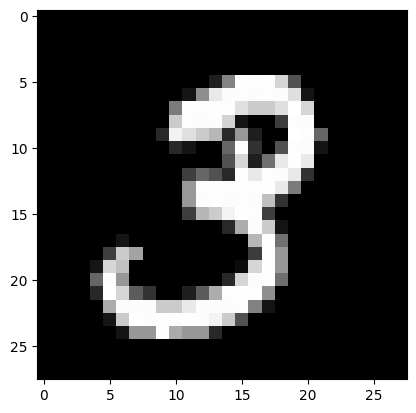

In [10]:
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

<h1 style="font-weight: bold; color: #00DA81; background: #10000E; padding: 24px 12px; border-radius: 4px;">Step 4. Model Building</h1>

To better understand this part I recommend watching [this video by Misra Turp](https://youtu.be/lcqgceCr_bk?si=bQtdARxSNX_McwYz) first

In [11]:
model = keras.Sequential()

# input layer
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# hidden layers
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))

# outcome layer
model.add(keras.layers.Dense(10, activation = "softmax"))

<div style="background: #e3eefc; padding: 24px 12px; margin: 4px 8px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold; color: #00773e;">You may ask why softmax not sigmoid and here is the reason:<br><br>
<span style="color: #00373E; font-weight: bold;">~ Sigmoid returns a single probability, while softmax returns relative probabilities that sum to 1 across multiple potential output classes. 
    <br><br>
    ~ Sigmoid is used for binary classification, while softmax is used for multi-class classification.</span></p>
</div>

### Now, let's take a deeper look into our model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


<div style="background: #e3eefc; padding: 24px 12px; margin: 4px 8px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold; color: #00373E;">Trainable parameters refer to the weights and biases that are adjusted during the training process in neural network.</p>
</div>

<h1 style="font-weight: bold; color: #00DA81; background: #10000E; padding: 24px 12px; border-radius: 4px;">Step 4. Compiling & fitting</h1>

**Compiling** optimizes all the math calculations and chooses the right training settings so the model can train smoothly. It checks for errors too. That way when you start training, the model doesn't get confused or run slow.

In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

You read more in Keras documentation; [losses](https://keras.io/api/losses/), [optimizers](https://keras.io/api/optimizers/#available-optimizers), and [metrics](https://keras.io/api/metrics/).

### Fitting the model
We fit models in deep learning to optimize the parameters of the model in order for it to perform well on the desired task. 

<ul>
    <li><code style="background:#00373E; border-radius: 4px;">batch</code> is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.</li>
    <li><code style="background:#00373E; border-radius: 4px;">epochs</code> how many times to do a pass over all the dataset</li>
</ul>

Read the documentation for more about [fit methods](https://keras.io/api/models/model_training_apis/#fit-method).

In [14]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid), batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6166 - accuracy: 0.8404 - val_loss: 0.3114 - val_accuracy: 0.9130
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2924 - accuracy: 0.9165 - val_loss: 0.2433 - val_accuracy: 0.9352
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2390 - accuracy: 0.9313 - val_loss: 0.2173 - val_accuracy: 0.9388
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2041 - accuracy: 0.9412 - val_loss: 0.1844 - val_accuracy: 0.9484
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1779 - accuracy: 0.9488 - val_loss: 0.1628 - val_accuracy: 0.9532
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1575 - accuracy: 0.9546 - val_loss: 0.1488 - val_accuracy: 0.9570
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1408 - accuracy: 0.9593 - val_loss: 0.1374 - val_accuracy:

<div style="background: #e3eefc; padding: 24px 12px; margin: 4px 8px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold; color: #00373E;">At the end, I got a validation accuracy of 0.9788 which is good for my first model.</p>
</div>

<h1 style="font-weight: bold; color: #00DA81; background: #10000E; padding: 24px 12px; border-radius: 4px;">Step 5. Model Evaluation</h1>

I'm going to evalute my model by plotting the loss and accuracy on training and validations sets over time.

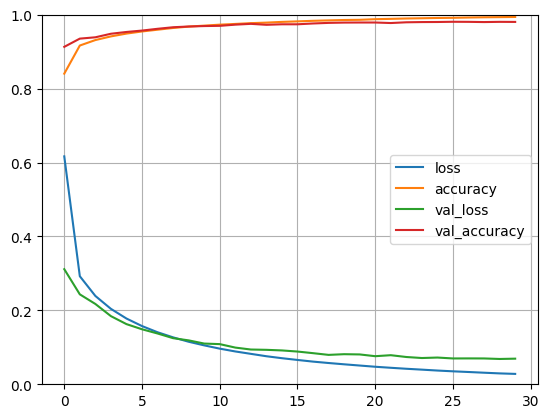

In [15]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

<div style="background: #e3eefc; padding: 24px 12px; margin: 4px 8px 4px 4px; border-radius: 4px;">
<p style="font-weight: bold; color: #00373E;">The accuracy of training goes higher and higher while the accuracy of validation set doesn't change that much.<br>
<span style="color: #BD0000; font-weight: bold;">And the same with the loss except it goes lower.</span></p>
</div>

### Now, let's check the model on the test set...

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9779


[0.06984876841306686, 0.9779000282287598]

### Okay, I need to now where is the confusion

313/313 [==============================] - 1s 2ms/step


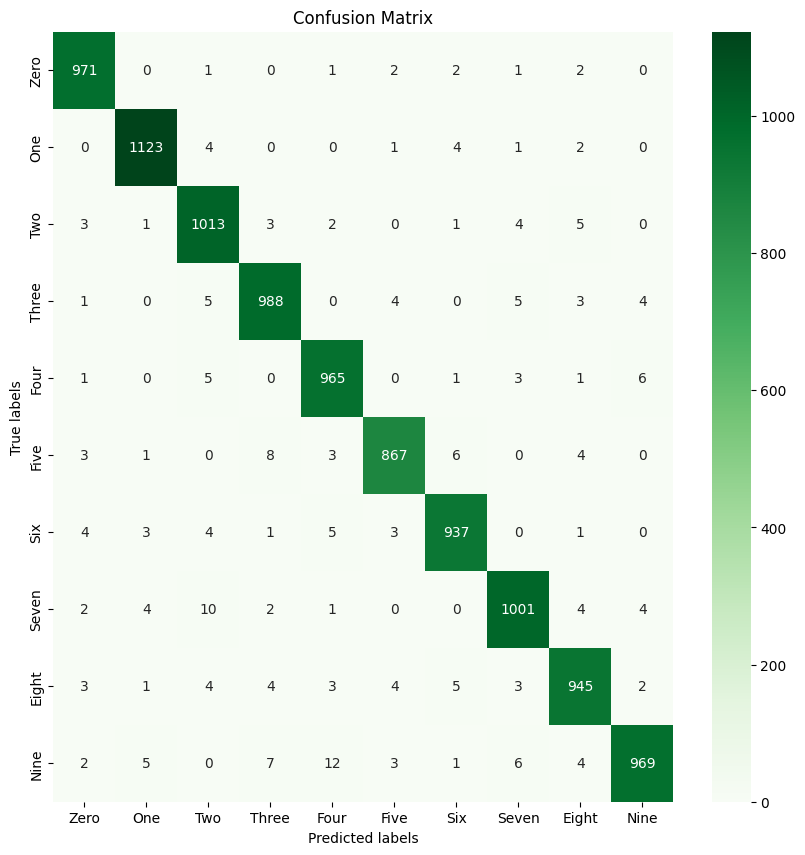

In [17]:
# prepare the confusion matrix
y_hat = model.predict(X_test)
y_classes = y_hat.argmax(axis=-1)
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

# plotting the confusion matrix
fig = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_name) 
fig.yaxis.set_ticklabels(class_name)
fig.figure.set_size_inches(10, 10)

plt.show()

Using this matrix you can go and change your model and check the results again.

# Useful Resources
- Misra Turp. 2022. [*50 Days of Deep Learning*](https://youtube.com/playlist?list=PLM8lYG2MzHmQn55ii0duXdO9QSoDF5myF&si=-3q96efmJOSV_mhM). YouTube.

- 3Blue1Brown. 2017. [*But what is neural network | Chapter 1, Deep learning*](https://youtu.be/aircAruvnKk?si=VcA8YupuS98hiFeR). YouTube.

- Mohamed Yosef. [*Marketing Promotions, Regression Analysis*](https://www.kaggle.com/code/mohamedyosef101/marketing-promotions-analysis). Kaggle. *((* For EDA *))*